# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ori_pen=pd.read_csv("penguins.csv")

In [3]:
ori_pen

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 评估清理数据

### 结构清理

无结构性问题

### 内容清理

In [4]:
cleaned_pen=ori_pen.copy()

In [5]:
cleaned_pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


将分类数据改为category，数值数据均存在两行空缺值，性别数据存在10行空缺值

In [6]:
cleaned_pen["species"]=cleaned_pen["species"].astype("category")
cleaned_pen["island"]=cleaned_pen["island"].astype("category")
cleaned_pen["sex"]=cleaned_pen["sex"].astype("category")

In [7]:
cleaned_pen[cleaned_pen["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
cleaned_pen=cleaned_pen.dropna(subset="culmen_length_mm")
cleaned_pen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


In [9]:
cleaned_pen[cleaned_pen["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


其余数据均正常，不予删除

### 删除重复数据

In [10]:
cleaned_pen.duplicated().sum()

np.int64(0)

无重复数据

### 修改不一致数据

In [11]:
cleaned_pen["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [12]:
cleaned_pen["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [13]:
cleaned_pen["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [14]:
cleaned_pen[cleaned_pen["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [15]:
cleaned_pen["sex"]=cleaned_pen["sex"].replace(".",np.nan)
cleaned_pen[cleaned_pen["sex"]=="."]

C:\Users\yrc\AppData\Local\Temp\ipykernel_8692\2081720348.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_pen["sex"]=cleaned_pen["sex"].replace(".",np.nan)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


### 查找不合理数据

In [16]:
cleaned_pen.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


无不合理数据

## 数据可视化

In [18]:
sns.set_palette("pastel")

In [19]:
cleaned_pen

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### 企鹅的种类比例

In [30]:
species_count=cleaned_pen["species"].value_counts()
species_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

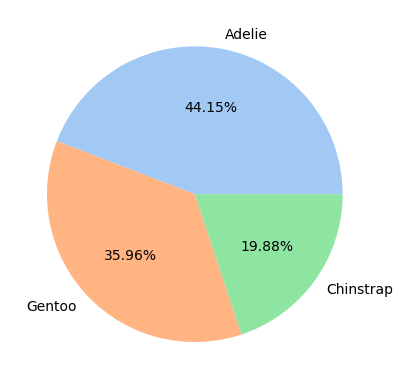

In [33]:
plt.pie(species_count,autopct="%.2f%%",labels=species_count.index)
plt.show()

#### 企鹅的所属岛屿比例

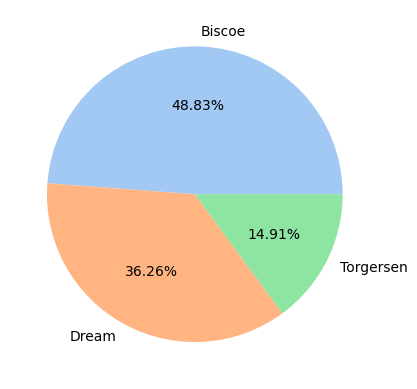

In [34]:
island_count=cleaned_pen["island"].value_counts()
plt.pie(island_count,autopct="%.2f%%",labels=island_count.index)
plt.show()

#### 企鹅性别比例

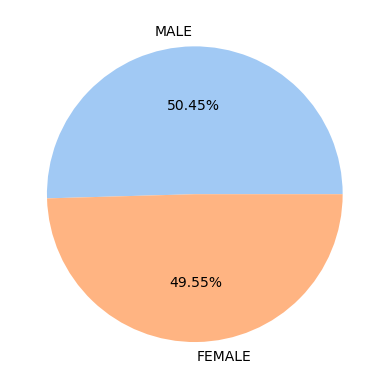

In [35]:
sex_count=cleaned_pen["sex"].value_counts()
plt.pie(sex_count,autopct="%.2f%%",labels=sex_count.index)
plt.show()

#### 不同岛上企鹅种类数量

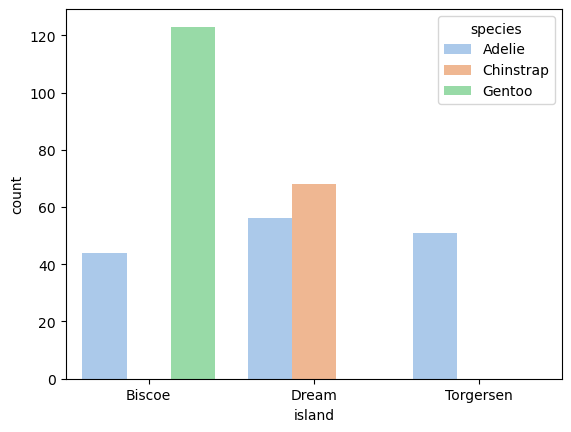

In [36]:
sns.countplot(cleaned_pen,x="island",hue="species")
plt.show()

#### 不同岛上企鹅性别分布

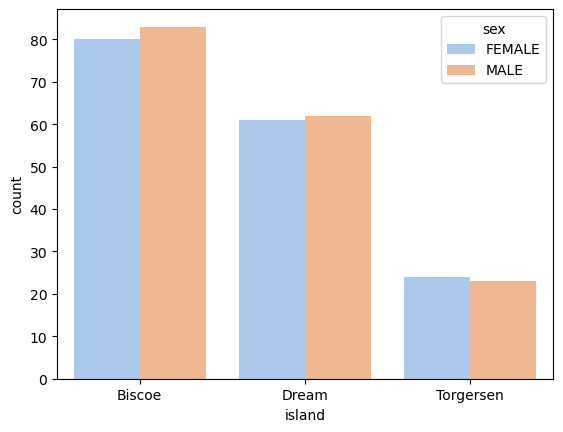

In [37]:
sns.countplot(cleaned_pen,x="island",hue="sex")
plt.show()

#### 数值之间的相对关系

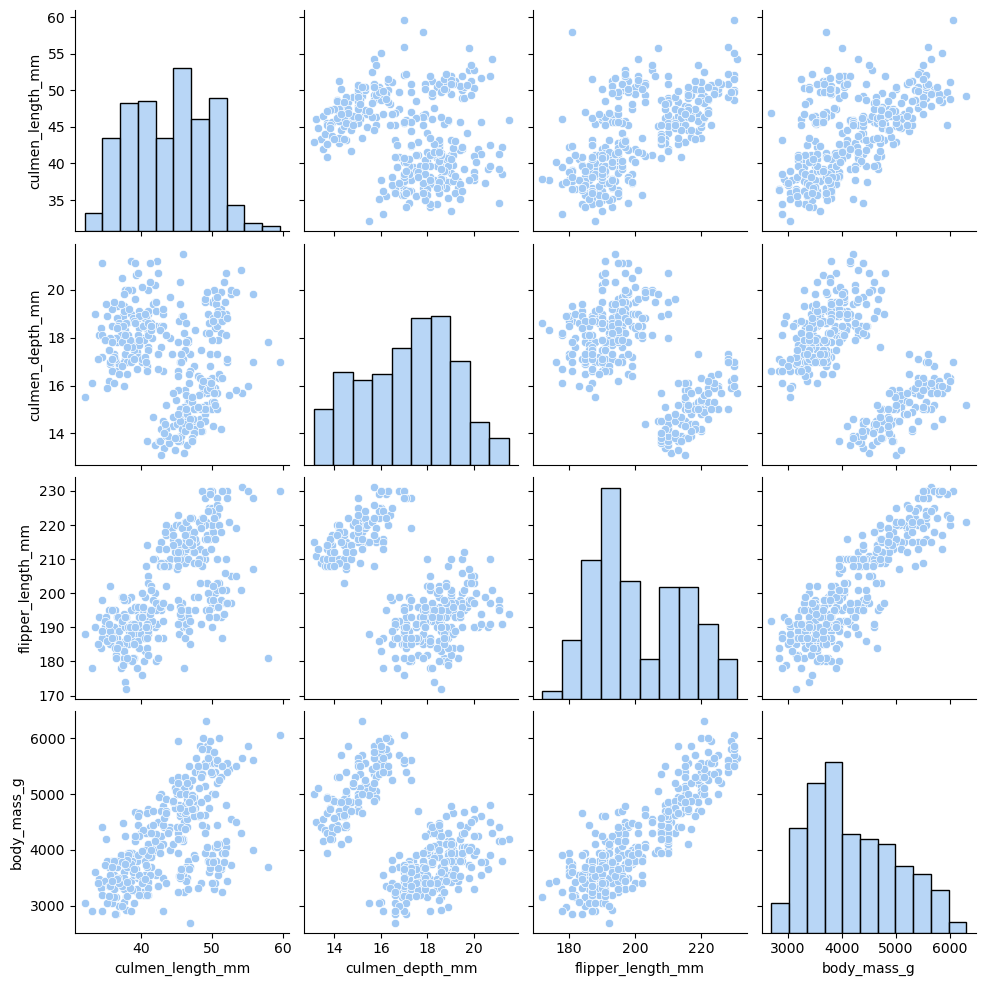

In [38]:
sns.pairplot(cleaned_pen)
plt.show()

#### 根据种类查看数值间相对关系

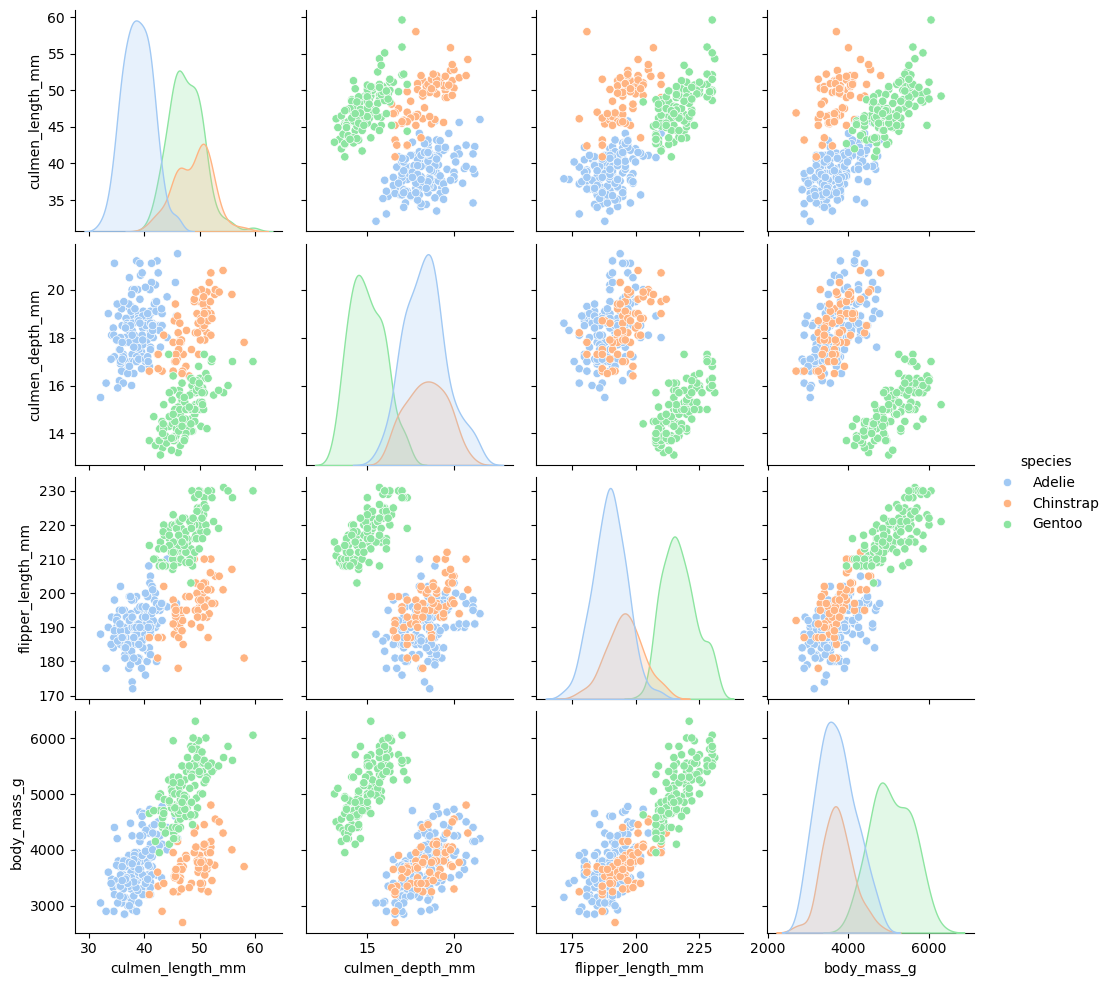

In [39]:
sns.pairplot(cleaned_pen,hue="species")
plt.show()

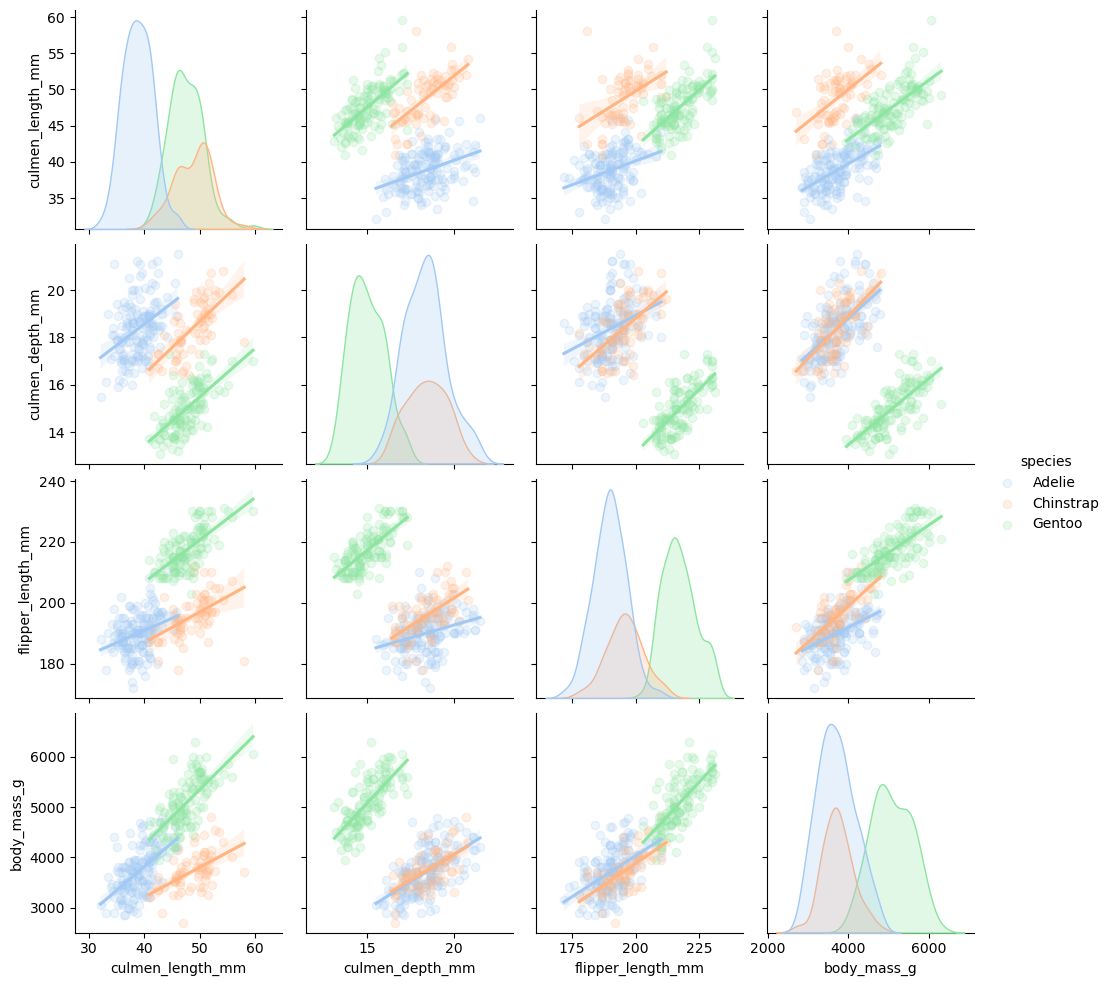

In [42]:
sns.pairplot(cleaned_pen,hue="species",kind="reg",plot_kws={"scatter_kws":{"alpha":0.2}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。
从密度图的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

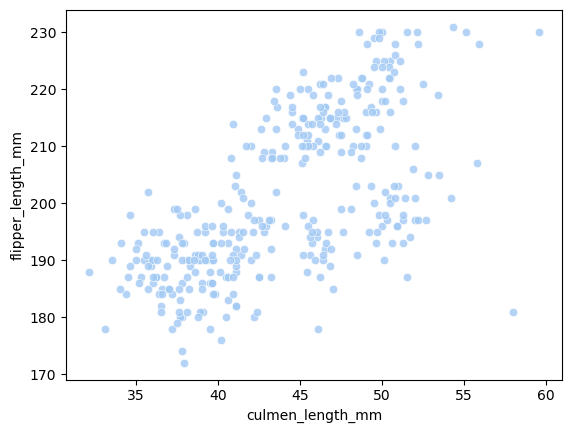

In [45]:
sns.scatterplot(cleaned_pen,x="culmen_length_mm",y="flipper_length_mm",alpha=0.8)
plt.show()

#### 根据性别查看数值分布关系

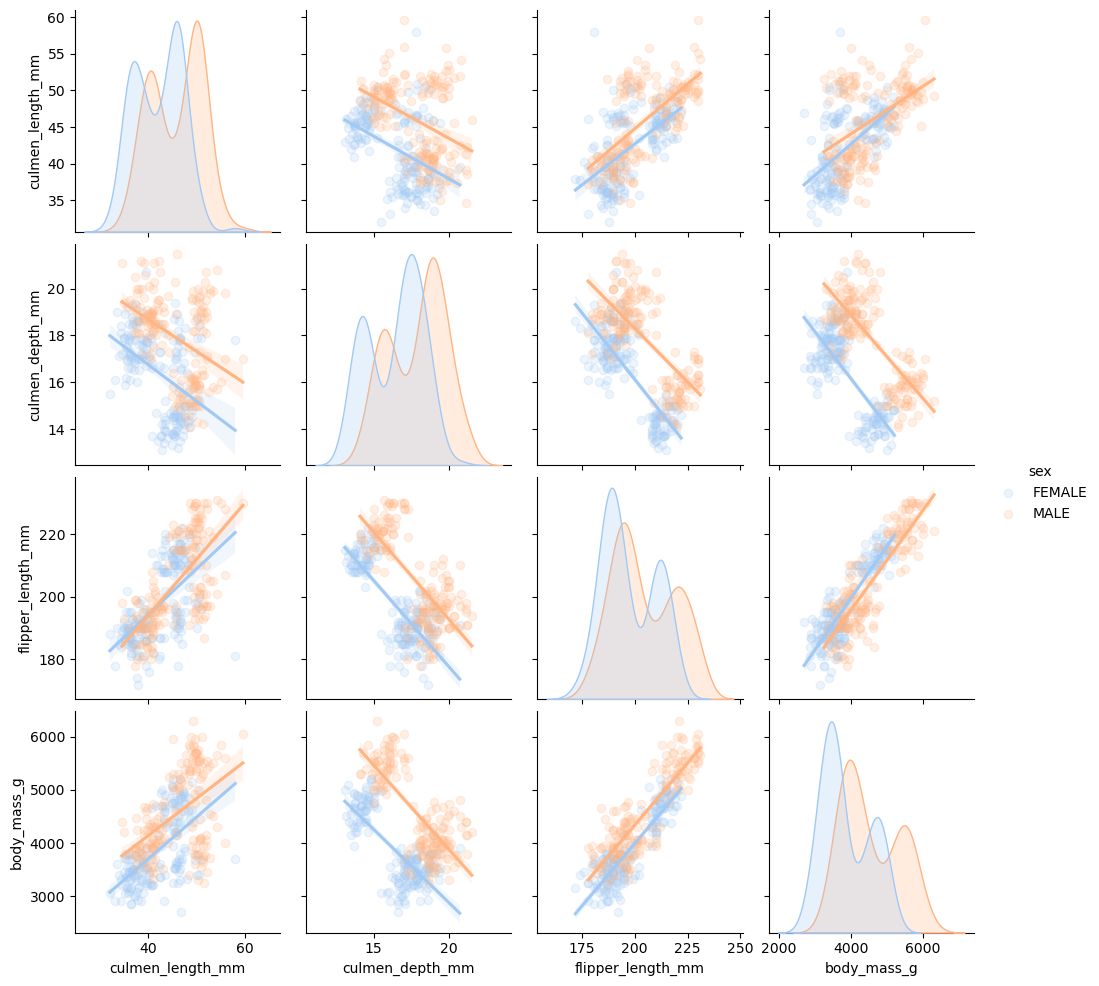

In [46]:
sns.pairplot(cleaned_pen,hue="sex",kind="reg",plot_kws={"scatter_kws":{"alpha":0.2}})
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。

In [47]:
cleaned_pen.to_csv("penguins_cleaned_datas.csv")
pd.read_csv("penguins_cleaned_datas.csv")

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...,...
337,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
338,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
339,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
340,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
